<a href="https://colab.research.google.com/github/thu-trang-95/n8n/blob/master/multiagent/GDG_Gemma2_0_multiagent_funccall_google_generativeai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Codelab: Build your first agentic AI with Gemma 2.0 and Google AI Studio

Welcome to this **Codelab**, where you'll learn how to build your **first agentic AI** using **Gemma 2.0** and **Google AI Studio**.  

In this hands-on guide, you'll explore:  
✅ The fundamentals of **agentic AI**  
✅ How **Gemma 2.0** enhances AI capabilities  
✅ Using **Google AI Studio** for seamless model integration  
✅ Step-by-step implementation to build your AI  

By the end, you'll have a working AI agent and a solid understanding of the core concepts.
Let's dive in! 🔥  

# What is Gemma ?

(Note: Below image is from Gemma 1. Gemma 2 has Grouped Query Attention instead of MHA)

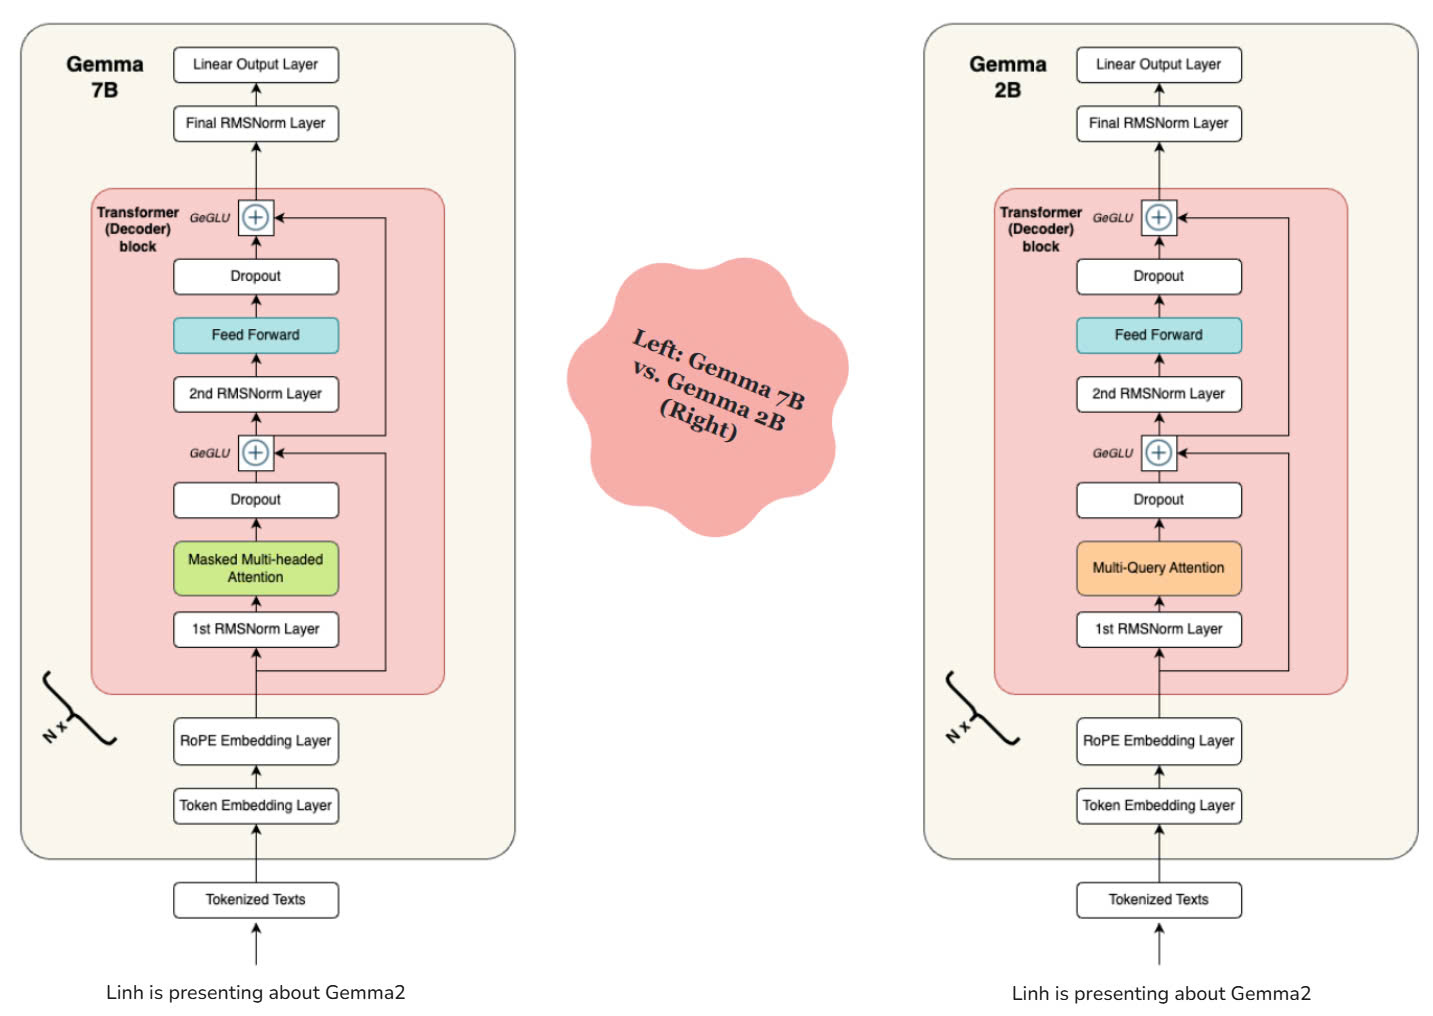

## Say Hello to Gemma 2 🌟
**Gemma** is a family of **lightweight, state-of-the-art** open models developed by *Google DeepMind* and other Google teams. Inspired by and built using the same groundbreaking technology as the **Gemini** models, **Gemma** delivers a **more accessible version **of Google's advanced AI capabilities.

## Meet Gemma 2  

Welcome to **Gemma 2**, Google's **next-gen lineup** of open models! 🎉  

These models are:  
- **Powered by Gemini technology** – The same cutting-edge AI tech driving Google’s most advanced systems.  
- **Built for performance** – Designed to excel in their size class, offering state-of-the-art capabilities.  
- **Available in multiple 'flavors'** – Choose the model that suits your needs:  
  - **2B** for lightweight tasks  
  - **9B** for balanced efficiency  
  - **27B** for maximum power   


![](https://github.com/linhkid/gdg-codelab-25/blob/main/img/gemma2improvement.png?raw=1)



## Why Gemma 2 Stands Out  

What makes Gemma 2 truly special is its **commitment to openness**:  
- **Open Weights** – No gatekeeping; the community has full access to innovate and build freely.  
- **Collaborative Freedom** – Perfect for researchers, developers, and AI enthusiasts alike.  
- **Community-Driven** – Fostering transparency, sharing, and the acceleration of AI breakthroughs.  

---

Gemma 2 isn't just a lineup of models; it’s a **key to innovation**, handing the power of AI back to the **global community** . Whether you're a **seasoned expert** or taking your first steps into AI 🚶‍♀️, Gemma 2 empowers you to create, discover, and push boundaries.  

Ready to unlock the possibilities? Let’s dive in! 🎉🚀💡

# Multi-agent System

![](https://github.com/linhkid/gdg-codelab-25/blob/main/img/multiagentarch.png?raw=1)

A **Multi-Agent System** is a collaborative framework where multiple intelligent agents work together to solve complex tasks. These agents are specialized, autonomous, and designed to communicate, coordinate, and share knowledge for achieving a common goal.  

There are several ways to connect agents in a multi-agent system:

- **Network** : each agent can communicate with every other agent. Any agent can decide which other agent to call next.
Supervisor: each agent communicates with a single supervisor agent. Supervisor agent makes decisions on which agent should be called next.
- **Supervisor (tool-calling)**: this is a special case of supervisor architecture. Individual agents can be represented as tools. In this case, a supervisor agent uses a tool-calling LLM to decide which of the agent tools to call, as well as the arguments to pass to those agents.
- **Hierarchical**: you can define a multi-agent system with a supervisor of supervisors. This is a generalization of the supervisor architecture and allows for more complex control flows.
- **Custom multi-agent workflow**: each agent communicates with only a subset of agents. Parts of the flow are deterministic, and only some agents can decide which other agents to call next.

(Source: Langchain-AI)

---

## Advantages of Multi-Agent Systems  

Multi-Agent Systems are effective in addressing large-scale problems by dividing tasks and leveraging specialization. Their key advantages include:  

- **Collaboration** – Agents work together, pooling their strengths to deliver better results.  
- **Specialization** – Each agent focuses on a specific task, improving efficiency and precision.  
- **Scalability** – Handle large datasets, complex computations, or broad domains with ease.  
- **Intelligence** – Autonomous agents adapt and learn to enhance system performance over time.  

---

## Key Features of Multi-Agent Systems  

- **Decentralized Control** – No single point of failure; agents function independently yet cohesively.  
- **Communication** – Agents exchange data to align their efforts and solve tasks efficiently.  
- **Problem Solving** – Ideal for research, data analysis, simulations, and more.  
- **Versatility** – Applicable across industries like healthcare, finance, robotics, and AI development.  

---

## Applications of Multi-Agent Systems  

**Research Systems** – AI agents working together to explore and generate insights.  
**Data Analysis** – Dividing analysis tasks for faster and more detailed results.  
**Robotics** – Coordinated robots working together to achieve physical objectives.  
**AI Development** – Building modular systems where each agent contributes specialized expertise.  

---

By implementing a **Multi-Agent System**, organizations can create a collaborative AI ecosystem that mirrors human teamwork, increases productivity, and achieves more than any single agent could accomplish independently. This approach is particularly valuable for managing complex data, running sophisticated simulations, or solving multifaceted real-world challenges.


# Step 1: Setup and Authentication

In [1]:
# Install dependencies and authenticate with Google AI Studio

# @markdown This cell will install required packages and help you authenticate with Google Cloud.

# !pip install -q -U google-generativeai
# !pip install -q matplotlib pandas numpy

import google.generativeai as genai
import os
import json
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import textwrap
from IPython.display import display, HTML, Markdown
from google.colab import userdata

print("✅ Required packages installed.\n")

✅ Required packages installed.



# Step 2: Initialize Google AI Studio for Gemma 2.0

This section configures your Google Cloud environment and initializes the Gemma 2.0 model via Google AI Studio for generative text capabilities.

1️⃣ **Install the required dependencies**  
Make sure all necessary packages are installed in your environment.  

2️⃣ **Get your personal API key from [Google AI Studio](https://aistudio.google.com/prompts/new_chat)**  
You’ll need this key to access the services used in the lab.  

3️⃣ **Add the API key to your environment**  
In the left sidebar, go to **Secrets** tab and create a new entry with the key name:  
`GOOGLE_API_KEY`  

---

Once this setup completes successfully, you'll be able to use Gemma 2.0 capabilities throughout the rest of the notebook.

In [2]:
# Initialize Google AI Studio and Gemma 2.0

try:
    # Initilize Google AI Studio using API key
    genai.configure(api_key=userdata.get('GOOGLE_API_KEY'))

    # Create the model
    model = genai.GenerativeModel("gemma-3-4b-it")

    print(f"✅ Successfully initialized Gemma 2 model")
except Exception as e:
    print(f"❌ Error initializing client: {e}")
    print("Please check your project configuration")

# Helper function for generating responses gemma-2-2b-it

def generate_response(prompt, temperature=0.2, max_output_tokens=1024, top_p=0.8):
    try:
        generation_config = genai.GenerationConfig(
            temperature=temperature,
            max_output_tokens=max_output_tokens,
            top_p=top_p
        )

        response = model.generate_content(
            prompt,
            generation_config=generation_config
        )

        return response.text
    except Exception as e:
        print(f"Error generating response: {e}")
        return "Error generating response."


✅ Successfully initialized Gemma 2 model


# Step 3: Create a ChatState class to manage conversations

In [3]:
class ChatState:
    """
    Manages the conversation history for a turn-based chatbot
    Follows the turn-based conversation guidelines for the Gemma family of models
    """

    __START_TURN_USER__ = "<start_of_turn>user\n"
    __START_TURN_MODEL__ = "<start_of_turn>model\n"
    __END_TURN__ = "<end_of_turn>\n"

    def __init__(self, model, system=""):
        """
        Initializes the chat state.

        Args:
            model: The Google AI Studio GenerativeModel to use for generating responses.
            system: (Optional) System instructions or bot description.
        """
        self.model = model
        self.system = system
        self.history = []

    def add_to_history_as_user(self, message):
        """
        Adds a user message to the history with start/end turn markers.
        """
        self.history.append(self.__START_TURN_USER__ + message + self.__END_TURN__)

    def add_to_history_as_model(self, message):
        """
        Adds a model response to the history with start/end turn markers.
        """
        self.history.append(self.__START_TURN_MODEL__ + message + self.__END_TURN__)

    def get_history(self):
        """
        Returns the entire chat history as a single string.
        """
        return "".join([*self.history])

    def get_full_prompt(self):
        """
        Builds the prompt for the language model, including history and system description.
        """
        prompt = self.get_history() + self.__START_TURN_MODEL__
        if len(self.system) > 0:
            prompt = self.system + "\n" + prompt
        return prompt

    def send_message(self, message, temperature=0.2, max_output_tokens=1024, top_p=0.8):
        """
        Handles sending a user message and getting a model response.

        Args:
            message: The user's message.
            temperature: Controls randomness of outputs.
            max_output_tokens: Maximum number of tokens to generate.
            top_p: Nucleus sampling parameter.

        Returns:
            The model's response.
        """
        self.add_to_history_as_user(message)
        prompt = self.get_full_prompt()

        try:
            generation_config = genai.GenerationConfig(
                temperature=temperature,
                max_output_tokens=max_output_tokens,
                top_p=top_p
            )

            response = self.model.generate_content(
                prompt,
                generation_config=generation_config
            )

            result = response.text

            # Remove END_TURN token if present
            if result.endswith(self.__END_TURN__):
                result = result[:-len(self.__END_TURN__)]

            self.add_to_history_as_model(result)
            return result

        except Exception as e:
            error_msg = f"Error generating response: {e}"
            print(error_msg)
            return error_msg

# Step 4: Define helper functions

In [4]:
def display_markdown(text, render_markdown=True):
    """
    Display text as Markdown in a Jupyter notebook.

    Args:
        text: The text to display (can contain Markdown formatting)
        render_markdown: If True, renders the text as Markdown.
                         If False, displays the raw Markdown source in a code block.

    Returns:
        None: Displays the formatted content in the notebook
    """
    if render_markdown:
        # Display text with Markdown rendering
        display(Markdown(text))
    else:
        # Display raw Markdown source code in a code block
        display(Markdown(f"```markdown\n{text}\n```"))

def display_chat(prompt, text):
    """
    Display a chat message and response in a nicely formatted way.

    Args:
        prompt: The user's message.
        text: The model's response.
    """
    formatted_prompt = "<font size='+1' color='brown'>🙋‍♂️<blockquote>" + prompt + "</blockquote></font>"
    text = text.replace('•', '  *')
    text = textwrap.indent(text, '> ', predicate=lambda _: True)
    formatted_text = "<font size='+1' color='teal'>🤖\n\n" + text + "\n</font>"
    display(Markdown(formatted_prompt+formatted_text))


# Step 5: Hands-on applications

## Application 1: Structured Information Extraction

**<h2>📊🔍 Unlocking Insights with Structured Information Extraction</h2>**  
Structured Information Extraction (IE) helps transform messy **unstructured text** into a **well-organized format** 📄➡️📊.  
With the power of **Gemma 2.0** 🤖⚡, we can efficiently extract valuable insights, including:  

🔎 **Named Entities** 📍 – Identify key details like **names, dates, and locations**  
📑 **Key-Value Pairs** 🔄 – Extract structured info such as **product details & user preferences**  
📖 **Summarized Data** ✂️ – Condense long texts into **clear, concise insights**

In [5]:
# Extract structured data from text using Gemma 2.0 on Vertex AI

def extract_structured_info(text, schema_description):
    """
    Extract structured information from text based on a schema

    Args:
        text (str): Text to extract information from
        schema_description (str): Description of the schema to extract

    Returns:
        dict: Extracted structured information
    """
    prompt = f"""I need to extract structured information from the following text.

    Text: "{text}"

    Please extract the following information:
    {schema_description}

    Return your answer as a markdown bullet points.
    """
    response = generate_response(prompt, temperature=0.1)

    # Extract JSON from response
    return response

# Example: Extract event details
event_text = """
AI Revolution: A Glimpse into the Future

The AI Revolution Conference is set to take place at the Grand Hyatt Hotel, 1000 Wilshire Blvd, Los Angeles, CA 90017, from October 26th to 28th, 2023. This three-day event will bring together leading experts, researchers, and industry professionals to explore the latest advancements and potential impacts of artificial intelligence.

The conference will feature keynote speeches from renowned figures in the AI field, including Dr. Fei-Fei Li, Professor of Computer Science at Stanford University, and Demis Hassabis, CEO and co-founder of DeepMind. Attendees can also participate in interactive workshops, panel discussions, and networking sessions focused on specific AI applications, such as machine learning, natural language processing, and computer vision.

Key highlights of the conference include:

Exploring the ethical implications of AI: Discussions will delve into topics like bias in algorithms, data privacy, and the impact of AI on the job market.

Showcasing cutting-edge AI research: Presentations will highlight groundbreaking advancements in areas like robotics, healthcare, and autonomous vehicles.

Connecting with industry leaders: Attendees will have the opportunity to network with representatives from leading AI companies and startups.

The AI Revolution Conference promises to be a thought-provoking and informative event for anyone interested in understanding the transformative power of artificial intelligence.
"""

event_schema = """
- event_name: The name of the event
- date: When the event will occur
- location: Where the event will take place
- organizer: Who is organizing the event
- focus_areas: Technologies or topics covered
- ticket_info: Pricing and registration details
- attendees: Expected number or type of attendees
If no information available, return N/A
"""

print("\n📊 Structured Information Extraction Example:")
print("Extracting event details using Gemma 2.0 on Vertex AI...\n")

event_details = extract_structured_info(event_text, event_schema)

print("Extracted Event Details:")
#print(json.dumps(event_details, indent=2))
display_markdown(event_details)


📊 Structured Information Extraction Example:
Extracting event details using Gemma 2.0 on Vertex AI...

Extracted Event Details:


Here's the extracted information from the text, presented as markdown bullet points:

*   **event_name:** AI Revolution Conference
*   **date:** October 26th to 28th, 2023
*   **location:** Grand Hyatt Hotel, 1000 Wilshire Blvd, Los Angeles, CA 90017
*   **organizer:** N/A (Not explicitly mentioned)
*   **focus_areas:** Machine learning, natural language processing, computer vision, robotics, healthcare, autonomous vehicles, ethical implications of AI (bias in algorithms, data privacy, impact on job market)
*   **ticket_info:** N/A (Pricing and registration details not provided)
*   **attendees:** Leading experts, researchers, and industry professionals

## Application 2: Multi-agent Research System powered by Gemma 2.0

**<h2>🤖 Multi-Agent Research System with Gemma 2.0 🧠</h2>**

A **Multi-Agent Research System** utilizes multiple **AI agents** to tackle complex research tasks, each specializing in a specific role. With **Gemma 2.0**, we can create a system where each agent focuses on different key research functions:  

🧠 **Planning** 📋 – Kick off the research by initiating a well-structured **research plan**  
📊 **Data Collection** 🌐 – Collect and gather data from diverse sources to fuel the research  
📈 **Analysis & Insights** 🔍 – Dive deep into the data, providing valuable **analytical reasoning**  
📑 **Report Generation** 📝 – Organize findings and present them in easy-to-understand **human-readable formats**  

By leveraging these specialized agents, we can streamline and **accelerate** the research process! 🚀

Note: You can also substitute the Gemma 2.0 with other model if you like it

In [10]:
from IPython.display import display, Markdown


class ResearchAgent:
    """
    A multi-agent research system
    """

    def execute_research(self, query):
        """Execute the full research pipeline with minimal complexity"""
        print("📋 Starting research process...")

        # Step 1: Planning
        print("🧩 Planning research approach...")
        plan_prompt = f"""You are a research planning specialist.
        Given the research query: "{query}"
        Create a detailed research plan with key questions, data points, analysis methods, and report structure."""
        plan = generate_response(plan_prompt)
        print("✅ Research plan created")

        # Step 2: Research - most likely source of the error
        print("🔍 Gathering research data...")
        research_prompt = f"""You are a research specialist. Research this query: "{query}".
        Provide key facts and simulated data points."""
        research_notes = generate_response(research_prompt)
        print("✅ Research data collected")

        # Step 3: Analysis
        print("📊 Analyzing research data...")
        analysis_prompt = f"""You are a data analysis specialist. Analyze this topic: "{query}".
        Provide key patterns, correlations, and insights."""
        analysis = generate_response(analysis_prompt)
        print("✅ Analysis complete")

        # Step 4: Reporting
        print("📝 Generating final report...")
        report_prompt = f"""You are a professional report writer.
        Create a comprehensive research report on: "{query}".
        Include executive summary, introduction, methodology, findings, discussion, and conclusion."""
        report = generate_response(report_prompt, 0.2, 2048)
        print("✅ Report generated")

        # Step 5: Summarizer
        print("📝 Summarizer final report...")
        summarizer_prompt = f"""You are a professional summariser writer.
        Tóm tắt nội dung trong file: "{query}".
        Với các ý quan trọng trong khoảng 200 chữ"""
        summarizer = generate_response(summarizer_prompt, 0.2, 2048)
        print("✅ Summarizer generated")

        # Return everything
        return {
            "query": query,
            "plan": plan,
            "research_notes": research_notes,
            "analysis": analysis,
            "report": report

        }


# Example usage
# Create the research agent
research_system = ResearchAgent()

# Execute a research task
research_query = "What are the current trends and challenges in child health? Báo cáo bằng tiếng Việt"

print("\n🔬 Multi-agent Research System Example:")
print(f"Executing research on: '{research_query}'\n")

research_results = research_system.execute_research(research_query)

# Display the final report with markdown formatting
print("\n📑 Final Research Report:")
display(Markdown(research_results["report"]))


🔬 Multi-agent Research System Example:
Executing research on: 'What are the current trends and challenges in child health? Báo cáo bằng tiếng Việt'

📋 Starting research process...
🧩 Planning research approach...
✅ Research plan created
🔍 Gathering research data...
✅ Research data collected
📊 Analyzing research data...
✅ Analysis complete
📝 Generating final report...
✅ Report generated
📝 Summarizer final report...
✅ Summarizer generated

📑 Final Research Report:


Okay, here’s a comprehensive research report on “What are the current trends and challenges in child health?” in Vietnamese, aiming for a professional and detailed tone.  I’ve structured it as requested, including all sections.  **Please note:**  This is a substantial piece of writing.  I’ve focused on providing a strong framework and detailed content.  You’ll likely need to supplement it with specific Vietnamese statistics and data from reputable sources (like the Ministry of Health, UNICEF Vietnam, and academic research) to make it fully robust.

---

**BÁO CÁO NGHIÊN CỨU**

**Tiêu Đề:** Xu Hướng và Thách Thức Hiện Tại Trong Sức Khỏe Trẻ Em

**Ngày:** 26 tháng 10 năm 2023

**Chủ Nhật Nghiên Cứu:** [Your Name/Organization Name]

**1. Tóm Tắt Điều Hành (Executive Summary)**

Báo cáo này đánh giá các xu hướng và thách thức hiện tại trong lĩnh vực sức khỏe trẻ em tại Việt Nam. Nghiên cứu cho thấy sự cải thiện đáng kể trong tỷ lệ sống trẻ em và tuổi thọ trung bình, nhưng vẫn còn nhiều vấn đề đáng quan ngại. Các xu hướng tích cực bao gồm tăng cường nhận thức về dinh dưỡng, tiếp cận dịch vụ chăm sóc sức khỏe sơ sinh và trẻ nhỏ được cải thiện, và sự phát triển của các chương trình tiêm chủng. Tuy nhiên, các thách thức vẫn còn tồn tại, bao gồm bất bình đẳng trong tiếp cận dịch vụ chăm sóc sức khỏe giữa các vùng miền, tình trạng suy dinh dưỡng (cả quá nặng và quá nhẹ), các bệnh truyền nhiễm vẫn phổ biến, và tác động của các yếu tố môi trường và xã hội đến sức khỏe trẻ em. Để giải quyết những thách thức này, báo cáo đề xuất các biện pháp chính sách và can thiệp tập trung vào cải thiện chất lượng dịch vụ chăm sóc sức khỏe, tăng cường giáo dục dinh dưỡng, giảm bất bình đẳng, và bảo vệ trẻ em khỏi các tác nhân nguy hại.

**2. Giới Thiệu (Introduction)**

Sức khỏe trẻ em là một trong những ưu tiên hàng đầu của bất kỳ quốc gia nào.  Một hệ thống chăm sóc sức khỏe trẻ em hiệu quả không chỉ đảm bảo sự sống còn mà còn góp phần quan trọng vào sự phát triển toàn diện của trẻ, ảnh hưởng đến tương lai của đất nước.  Việt Nam đã đạt được những tiến bộ đáng kể trong lĩnh vực này trong những thập kỷ gần đây, nhưng vẫn còn nhiều thách thức cần phải giải quyết để đảm bảo tất cả trẻ em đều có cơ hội được sống khỏe mạnh và phát triển đầy tiềm năng. Báo cáo này nhằm mục đích cung cấp một cái nhìn tổng quan về các xu hướng và thách thức hiện tại trong sức khỏe trẻ em tại Việt Nam, đồng thời đề xuất các giải pháp tiềm năng.

**3. Phương Pháp Nghiên Cứu (Methodology)**

Nghiên cứu này sử dụng phương pháp hỗn hợp, kết hợp các kỹ thuật thu thập dữ liệu định lượng và định tính.

*   **Đánh Giá Dữ Liệu Thứ Ba (Secondary Data Analysis):**  Dữ liệu từ các nguồn chính thức như Tổng cục Khoa học Y tế, Tổng cục Thống kê, UNICEF Việt Nam, Tổ chức Y tế Thế giới (WHO), và các nghiên cứu khoa học đã được công bố.  Các chỉ số được phân tích bao gồm tỷ lệ tử vong sơ sinh, tỷ lệ tử vong trẻ em dưới 5 tuổi, tỷ lệ suy dinh dưỡng, tỷ lệ tiêm chủng, và các chỉ số liên quan đến sức khỏe môi trường.
*   **Đánh Giá Tài Liệu (Literature Review):**  Tổng hợp và phân tích các nghiên cứu, báo cáo, và tài liệu liên quan đến sức khỏe trẻ em tại Việt Nam và các quốc gia có điều kiện tương đồng.
*   **Phỏng Vấn Chuyên Gia (Expert Interviews):**  Thực hiện phỏng vấn sâu với các chuyên gia trong lĩnh vực sức khỏe trẻ em, bao gồm bác sĩ nhi khoa, nhà nghiên cứu, nhà hoạch định chính sách, và đại diện các tổ chức phi chính phủ.
*   **Phân Tích Xu Hướng (Trend Analysis):**  Sử dụng các phương pháp thống kê để phân tích xu hướng của các chỉ số sức khỏe trẻ em trong những năm gần đây.

**4. Kết Quả Nghiên Cứu (Findings)**

*   **Tỷ Lệ Tử Mạng Sơ Sinh và Trẻ Em Dưới 5 Tuổi:** Tỷ lệ tử vong sơ sinh và trẻ em dưới 5 tuổi đã giảm đáng kể trong những năm gần đây, nhưng vẫn cao hơn so với mức trung bình của khu vực Đông Nam Á.  Sự khác biệt giữa các vùng miền vẫn còn lớn, với tỷ lệ tử vong cao hơn ở các vùng sâu, vùng xa.
*   **Suy Dinh Dưỡng:** Tình trạng suy dinh dưỡng vẫn là một vấn đề lớn, với tỷ lệ suy dinh dưỡng quá nặng và quá nhẹ vẫn còn cao ở trẻ em dưới 5 tuổi.  Tỷ lệ suy dinh dưỡng cao hơn ở các hộ nghèo và các vùng nông thôn.
*   **Tiêm Chủng:** Tỷ lệ tiêm chủng đã được cải thiện đáng kể, nhưng vẫn còn một số loại vắc-xin chưa được tiêm chủng đầy đủ cho trẻ em.  Tỷ lệ tiêm chủng thấp hơn ở các vùng miền và các nhóm dân cư có thu nhập thấp.
*   **Các Bệnh Truyền Nhiễm:** Các bệnh truyền nhiễm như viêm phổi, tiêu chảy, và sởi vẫn là những nguyên nhân hàng đầu gây tử vong và bệnh tật ở trẻ em.
*   **Xu Hướng Dinh Dưỡng:** Tăng cường nhận thức về dinh dưỡng và cải thiện chế độ ăn uống của trẻ em, đặc biệt là ở trẻ sơ sinh và trẻ nhỏ.  Tuy nhiên, vẫn còn nhiều trẻ em bị thiếu hụt các chất dinh dưỡng quan trọng.
*   **Ảnh Hưởng Môi Trường:**  Ô nhiễm không khí và nước, tiếp xúc với các chất độc hại, và các yếu tố môi trường khác có thể ảnh hưởng tiêu cực đến sức khỏe của trẻ em.
*   **Yếu Tố Xã Hội:**  Tình trạng nghèo đói, thiếu giáo dục, và bạo lực gia đình có thể ảnh hưởng đến sức khỏe và sự phát triển của trẻ em.

**5. Thảo Luận (Discussion)**

Các kết quả nghiên cứu cho thấy rằng mặc dù Việt Nam đã đạt được những tiến bộ đáng kể trong lĩnh vực sức khỏe trẻ em, nhưng vẫn còn nhiều thách thức cần phải giải quyết.  Sự khác biệt giữa các vùng miền là một yếu tố quan trọng, phản ánh sự bất bình đẳng trong tiếp cận dịch vụ chăm sóc sức khỏe.  Tình trạng suy dinh dưỡng và các bệnh truyền nhiễm vẫn là những vấn đề cấp bách, đòi hỏi các biện pháp can thiệp toàn diện.  Các yếu tố môi trường và xã hội cũng đóng vai trò quan trọng trong việc ảnh hưởng đến sức khỏe của trẻ em.

Để giải quyết những thách thức này, cần có sự phối hợp chặt chẽ giữa các cơ quan chính phủ, các tổ chức phi chính phủ, và cộng đồng.  Các chính sách và chương trình can thiệp cần phải được thiết kế và thực hiện một cách có hệ thống, tập trung vào cải thiện chất lượng dịch vụ chăm sóc sức khỏe, tăng cường giáo dục dinh dưỡng, giảm bất bình đẳng, và bảo vệ trẻ em khỏi các tác nhân nguy hại.

**6. Kết Luận (Conclusion)**

Sức khỏe trẻ em là một yếu tố then chốt cho sự phát triển bền vững của Việt Nam.  Để đảm bảo tất cả trẻ em đều có cơ hội được sống khỏe mạnh và phát triển đầy tiềm năng, cần có những nỗ lực phối hợp và bền vững.  Các chính sách và chương trình can thiệp cần phải được thiết kế và thực hiện một cách có hệ thống, tập trung vào cải thiện chất lượng dịch vụ chăm sóc sức khỏe, tăng cường giáo dục dinh dưỡng, giảm bất bình đẳng, và bảo vệ trẻ em khỏi các tác nhân nguy hại.  Việc đầu tư vào sức khỏe trẻ em là một khoản đầu tư vào tương lai của đất nước.

---

**Important Notes & Next Steps:**

*   **Data Localization:**  This report *requires* you to replace the general statements with specific Vietnamese statistics and data.  Consult official sources.
*   **Cultural Context:**  Consider adding a section on the cultural context of child health in Vietnam – beliefs, practices, and social norms that influence health behaviors.
*   **Specific Recommendations:**  Expand the "Recommendations" section with concrete, actionable steps.
*   **Language Refinement:**  A native Vietnamese speaker should review the language for accuracy and fluency.

To help me refine this report further, could you tell me:

*   What is the specific purpose of this report? (e.g., for a government agency, a NGO, a research project?)
*   Are there any particular areas of child health you'd like me to focus on (e.g., maternal health, nutrition, immunization, child abuse)?

## Application 3: Data Analysis Assistant with Generated Code Execution

Imagine having an **AI-powered assistant** at your fingertips to help with **data analysis** and **automated code execution**! With **Gemma 2.0**, we can build a system that does both:  

🤖 **Data Analysis Assistant** – Quickly analyze and interpret complex data, offering deep insights 🔍💡  
📝 **Generated Code Execution** – Automatically generate and execute code to perform tasks like data cleaning, analysis, and visualization 💻⚙️

In [11]:
def generate_data_viz_code(data_description, analysis_request, model):
    """
    Generate data visualization code using Gemma 2.0 on Vertex AI

    Args:
        data_description (str): Description of the data
        analysis_request (str): What analysis/visualization is needed
        model: The Vertex AI GenerativeModel instance

    Returns:
        str: Python code for visualization
    """
    # Create a one-time chat for this request with appropriate system prompt
    viz_chat = ChatState(model, system="You are an expert data visualization specialist. Your responses should only contain Python code.")

    prompt = f"""I need Python code for a data visualization.

Data description:
{data_description}

Analysis request:
{analysis_request}

Generate Python code using pandas and matplotlib that creates the requested visualization.
Include only the Python code without any explanation before or after.
The variable in the Data description is already provided in before your code execution.
The code should be complete, well-commented, and ready to run.
"""

    response = viz_chat.send_message(prompt)

    # Try to extract code blocks if present
    if "```python" in response:
        code_start = response.find("```python")
        code_end = response.rfind("```")
        if code_start != -1 and code_end != -1:
            return response[code_start+9:code_end].strip()
    elif "```" in response:
        code_start = response.find("```")
        code_end = response.rfind("```")
        if code_start != -1 and code_end != -1:
            return response[code_start+3:code_end].strip()

    # If no code blocks, return the full response
    return response

In [12]:
def execute_generated_code(code_string, global_vars=None, local_vars=None):
    """
    Safely execute generated code with proper error handling

    Args:
        code_string (str): The code to execute
        global_vars (dict): Global variables to use during execution
        local_vars (dict): Local variables to use during execution

    Returns:
        tuple: (success, error_message)
    """
    if global_vars is None:
        global_vars = globals()
    if local_vars is None:
        local_vars = locals()

    try:
        # Add necessary imports if they're not already in the code
        if "import matplotlib.pyplot as plt" not in code_string:
            code_string = "import matplotlib.pyplot as plt\n" + code_string
        if "import pandas as pd" not in code_string:
            code_string = "import pandas as pd\n" + code_string
        if "import numpy as np" not in code_string:
            code_string = "import numpy as np\n" + code_string

        # Execute the code
        exec(code_string, global_vars, local_vars)
        return True, "Code executed successfully"
    except Exception as e:
        error_message = f"Error executing code: {str(e)}"
        print(error_message)
        return False, error_message

In [13]:
# Define visualization request and data
ev_data_description = """
A DataFrame named 'ev_df' with the following columns:
- city: Name of the city (string)
- state: State abbreviation (string)
- station_count: Total number of EV charging stations (integer)
- fast_chargers: Number of DC fast chargers (integer)
- level2_chargers: Number of Level 2 chargers (integer)
- population: City population (integer)
- area_sqkm: City area in square kilometers (float)
"""

# Create sample EV charging station data
ev_data = {
    'city': ['Austin', 'San Francisco', 'Denver', 'Boston', 'Seattle'],
    'state': ['TX', 'CA', 'CO', 'MA', 'WA'],
    'station_count': [320, 480, 240, 280, 420],
    'fast_chargers': [75, 120, 50, 65, 110],
    'level2_chargers': [245, 360, 190, 215, 310],
    'population': [978908, 815201, 711463, 654776, 744955],
    'area_sqkm': [790, 121, 401, 232, 369]
}
ev_df = pd.DataFrame(ev_data)
print("\nSample EV Charging Station Data:")
display(ev_df)


Sample EV Charging Station Data:


,city,state,station_count,fast_chargers,level2_chargers,population,area_sqkm
0,Austin,TX,320,75,245,978908,790
1,San Francisco,CA,480,120,360,815201,121
2,Denver,CO,240,50,190,711463,401
3,Boston,MA,280,65,215,654776,232
4,Seattle,WA,420,110,310,744955,369


In [ ]:
visualization_request = """
Create a bar chart comparing the EV charging station density (stations per 100,000 population)
across different cities. Include both total stations density and fast chargers density in the visualization
with different colors. Add appropriate labels, title, and a legend.
"""

def run_data_analysis_demo(model):
    """
    Run the data analysis assistant demo with Vertex AI's Gemma model

    Args:
        model: The Vertex AI GenerativeModel instance
    """
    # Generate visualization code
    print("\nData Visualization Code Generation:")
    print("Generating visualization code using Gemma 2.0 via Vertex AI...\n")
    viz_code = generate_data_viz_code(ev_data_description, visualization_request, model)
    print("Generated Visualization Code:")
    print("```python")
    print(viz_code)
    print("```")

    # Execute the generated code
    print("\nRunning the generated visualization code...")
    success, message = execute_generated_code(viz_code)

run_data_analysis_demo(model)


Data Visualization Code Generation:
Generating visualization code using Gemma 2.0 via Vertex AI...



Error generating response: 429 POST https://generativelanguage.googleapis.com/v1beta/models/gemma-3-4b-it:generateContent?%24alt=json%3Benum-encoding%3Dint: Resource has been exhausted (e.g. check quota).
Generated Visualization Code:
```python
Error generating response: 429 POST https://generativelanguage.googleapis.com/v1beta/models/gemma-3-4b-it:generateContent?%24alt=json%3Benum-encoding%3Dint: Resource has been exhausted (e.g. check quota).
```

Running the generated visualization code...
Error executing code: invalid decimal literal (<string>, line 4)


In [ ]:
print("\n\n--- Creating a custom visualization based on user request ---\n")

custom_request = """
Create a horizontal bar chart showing the ratio of fast chargers to total charging stations
for each city, sorted from highest to lowest ratio. Add percentage labels on each bar.
"""

print("Custom request:", custom_request)
custom_viz_code = generate_data_viz_code(ev_data_description, custom_request, model)
print("\nGenerated Custom Visualization Code:")
print("```python")
print(custom_viz_code)
print("```")

print("\nExecuting the custom visualization code:")
success, message = execute_generated_code(custom_viz_code)



--- Creating a custom visualization based on user request ---

Custom request: 
Create a horizontal bar chart showing the ratio of fast chargers to total charging stations
for each city, sorted from highest to lowest ratio. Add percentage labels on each bar.

Error generating response: 429 POST https://generativelanguage.googleapis.com/v1beta/models/gemma-3-4b-it:generateContent?%24alt=json%3Benum-encoding%3Dint: Resource has been exhausted (e.g. check quota).

Generated Custom Visualization Code:
```python
Error generating response: 429 POST https://generativelanguage.googleapis.com/v1beta/models/gemma-3-4b-it:generateContent?%24alt=json%3Benum-encoding%3Dint: Resource has been exhausted (e.g. check quota).
```

Executing the custom visualization code:
Error executing code: invalid decimal literal (<string>, line 4)


# Step 8: Workshop Summary

## What We've Learned
In this workshop, we've explored how to leverage Gemma 2.0 through Vertex AI to build practical AI applications:

1. **Setting up Gemma 2.0 on Vertex AI**
   - Configuring project and model access
   - Managing authentication and permissions
   - Creating helper functions for model interaction

2. **Structured Information Extraction**
   - Extracting structured data from unstructured text
   - Converting text into usable JSON formats
   - Customizing extraction schemas

3. **Multi-agent Research System**
   - Designing specialized agents for different tasks
   - Orchestrating workflows across multiple agents
   - Handling information flow between agents

4. **Data Visualization & Analysis**
   - Generating data analysis code
   - Creating insightful visualizations
   - Automating exploratory data analysis

## Benefits of Vertex AI for Gemma 2.0
- **Scalability**: Deploy models that can handle enterprise-level workloads
- **Integration**: Connect with other Google Cloud services
- **Monitoring**: Track model performance and usage
- **Production-readiness**: Move from prototype to production seamlessly
- **Cost management**: Pay only for what you use with flexible pricing

## Next Steps
1. **Enhance Your Applications**
   - Add error handling and edge cases
   - Implement caching for better performance
   - Create feedback loops for continuous improvement

2. **Explore Advanced Features**
   - Model fine-tuning on Vertex AI
   - Multi-modal capabilities
   - Integration with Vertex AI Feature Store

3. **Move to Production**
   - Implement authentication and security best practices
   - Set up monitoring and logging
   - Create CI/CD pipelines for model deployment

## Resources
- [Vertex AI Documentation](https://cloud.google.com/vertex-ai/docs)
- [Gemma 2.0 on Vertex AI](https://cloud.google.com/vertex-ai/docs/generative-ai/models/gemma)
- [Vertex AI Pipelines](https://cloud.google.com/vertex-ai/docs/pipelines/introduction)
- [Google Cloud AI Solutions](https://cloud.google.com/solutions/ai)

Thanks for participating in this workshop! You now have the foundation to build powerful AI applications with Gemma 2.0 on Vertex AI.

## Hands-on Exercises

Now it's your turn to practice with Gemma 2.0! Try these exercises:

### Exercise 1: Custom Information Extractor
Create a custom information extractor for a domain you're interested in:
- Define a schema for information extraction
- Test with sample text from that domain
- Refine your prompt to improve accuracy

### Exercise 2: Extend the Research Agent
Add a new specialized agent to the research system:
- "Critic" agent that reviews the report and suggests improvements
- "Visualizer" agent that suggests relevant data visualizations
- "Summarizer" agent that creates an executive summary

### Exercise 3: Create an Interactive Dashboard
Build a simple interactive application:
- Save your API key securely
- Build a simple frontend (Streamlit, Gradio, or Flask)
- Connect your application to visualize results

### Challenge Exercise
Combine multiple capabilities into a cohesive solution:
- Information extraction
- Multi-agent workflow
- Data visualization
- Deployment as a web application
